# Dataset Analysis for Real life deception detection trial data

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In the provided dataset, there is no easely accessible pre-parsed list of who is shown in which video. This is an issue as, to accurately train and test the model, we must ensure that the dataset is such that the same person does not occur in both train and test set, as this may lead to the model simply memorizing that persons face instead of generalizing and finding features indicating deception.

I extracted the lists present the deceptive.txt an truthful.txt files from the readme file accompaning the dataset.

In [90]:
names_deceptive = pd.read_table('deceptive.txt', sep='|').reset_index()[['level_1','level_2']].dropna()[1:].set_index('level_1')
names_deceptive['lie/truth'] = True #True = person is telling the truth

names_truthful = pd.read_table('truthful.txt', sep='|').reset_index()[['level_1','level_2']].dropna().set_index('level_1')
names_truthful['lie/truth'] = False

subjects = pd.concat([names_deceptive, names_truthful])
subjects['video'] = range(0, 121) #index in list of videos

subjects.head()

,level_2,lie/truth,video
level_1,,,
trial_lie_001.mp4,Defendant / Amanda Hayes,True,0
trial_lie_002.mp4,Defendant / Amanda Hayes,True,1
trial_lie_003.mp4,Defendant / Amanda Hayes,True,2
trial_lie_004.mp4,Defendant / Amanda Hayes,True,3
trial_lie_005.mp4,Defendant / Amanda Hayes,True,4


As we can see, the title of the person is also present in the dataset. Further examination reveals that this obscures dublicates as people are present in the dataset under different titles multiple times, such as being defendant and witness (which, considering that those videos show the same person in samples tested, we assume to be the same person).

Thus I remove the title:

In [91]:
def get_name(x):
    y= None
    try:
        y = x.split('/ ')[1].strip()
        return y
    except:
        return x.strip()

subjects.level_2 = subjects.level_2.map(get_name)

In [92]:
subjects.head()

,level_2,lie/truth,video
level_1,,,
trial_lie_001.mp4,Amanda Hayes,True,0
trial_lie_002.mp4,Amanda Hayes,True,1
trial_lie_003.mp4,Amanda Hayes,True,2
trial_lie_004.mp4,Amanda Hayes,True,3
trial_lie_005.mp4,Amanda Hayes,True,4


In [93]:
values_counts = subjects.level_2.value_counts()

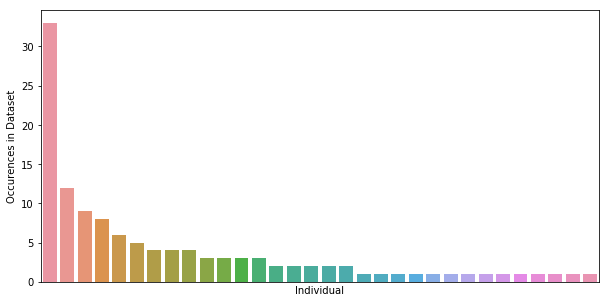

In [94]:
plt.figure(figsize=(10, 5))
sns.barplot(y=values_counts.tolist(), x=values_counts.index.tolist())
plt.xticks([])
plt.ylabel('Occurences in Dataset')
plt.xlabel('Individual')

In [95]:
values_counts.head()

Jodi Arias           33
Andrea Sneiderman    12
Amanda Hayes          9
Bessman Okafor        8
Crystal Mangum        6
Name: level_2, dtype: int64

In [96]:
len(values_counts)

32

As one can observe, depsite the dataset containing 121 videos, it only has 32 distinct people appear, and out of which, one participant accounts for more than $1/4$ of the videos in the dataset. 

Now, further investigating the samples, we look at them with respect to wether they are supposed to show truth or deception.

In [97]:
db = pd.DataFrame(subjects.groupby('level_2')['lie/truth'].value_counts())
db.columns = ['occurences']
db

occurences
level_2                         lie/truth            
Alan Newton                     False               1
Amanda Hayes                    True                6
                                False               3
Andrea Sneiderman               True                7
                                False               5
Bessman Okafor                  False               8
Candace Conti                   True                3
Carlos Miller                   True                4
Carlos Riley                    False               1
Charles and Kimberly Matthews   False               5
Chris Ochoa                     False               2
Crystal Mangum                  True                4
                                False               2
Donna Scrivo                    False               1
                                True                1
Dyches, Hall, and Hopkins trial True                1
Edgar Collazo                   False               1
Fernando Bermudez               False               2
James Boyd                      False               4
Jamie Hood                      False               2
                                True                2
Jodi Arias                      True               22
                                False              11
Jonathan Santillan              False               1
Kelly Burke                     True                1
Ken Wyniemko                    False               2
Lance Armstrong                 True                1
Marissa Devault                 True                3
Martin Macneill                 False               1
Marvin Anderson                 False               1
Michael Dunn                    True                1
Mitchelle Blair                 False               2
                                True                1
Owen Labrie                     False               1
Randy Mills                     False               1
Robert Dziekanski               True                3
Scott Peterson                  True                1
Steven Barnes                   False               1
The innocence project           False               2

In [99]:
subjects.head()

,level_2,lie/truth,video
level_1,,,
trial_lie_001.mp4,Amanda Hayes,True,0
trial_lie_002.mp4,Amanda Hayes,True,1
trial_lie_003.mp4,Amanda Hayes,True,2
trial_lie_004.mp4,Amanda Hayes,True,3
trial_lie_005.mp4,Amanda Hayes,True,4


In [102]:
subjects['Truth'] = 0
subjects.loc[subjects['lie/truth'], 'Truth'] = 1

subjects['Deception'] = 1
subjects.loc[subjects['lie/truth'], 'Deception'] = 0

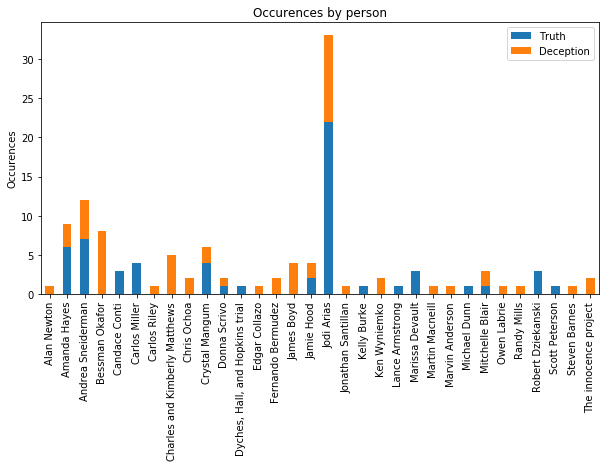

In [117]:
subjects.groupby('level_2')[['Truth', 'Deception']].sum().plot(kind='bar', stacked=True, figsize=(10, 5))
plt.xlabel('')
plt.ylabel('Occurences')
plt.title('Occurences by person')